In [26]:
import pandas as pd
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import geopy.distance
from tqdm import tqdm
import numpy as np

In [17]:
with open('../data/raw/sites.json','r') as f:
    sites_info = json.load(f)

sites_info = sites_info['sites']

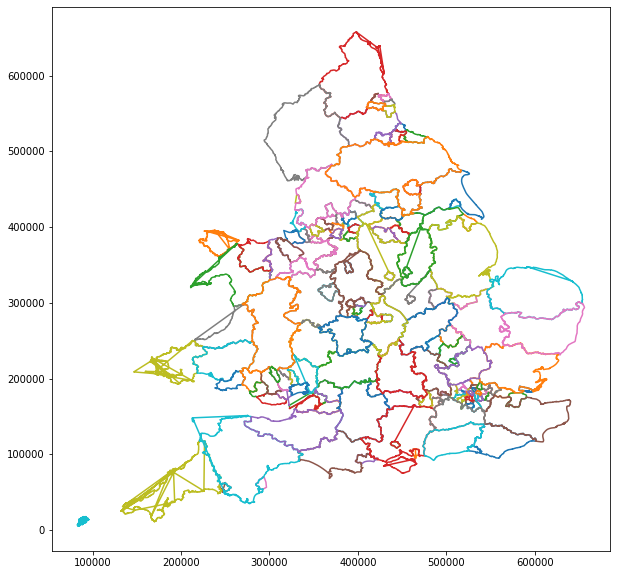

In [3]:
shape_file_path = "../data/raw/Counties_and_Unitary_Authorities__April_2019__Boundaries_EW_BFE-shp/Counties_and_Unitary_Authorities__April_2019__Boundaries_EW_BFE.shp"
sf = shp.Reader(shape_file_path)

fig , ax = plt.subplots(1,1,figsize=(10,10))
for shape in sf.shapeRecords():
    plt.gca()
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y)

plt.show()

In [5]:
shape.record

Record #172: [173, 'W06000024', 'Merthyr Tydfil', 'Merthyr Tudful', 305916, 206424, -3.36424994, 51.74858093, 111957018.60822716, 66696.9295920603]

In [7]:
shape.shape.shapeTypeName

'POLYGON'

In [9]:
flow_df = pd.read_csv('../data/processed/traffic_flow_uk.csv')

In [24]:
def get_traffic_for_shape_file(shape_file_path, traffic_sites_info):
    sf = shp.Reader(shape_file_path)
    districts = sf.shapeRecords()
    clusters = []
    for idx,row in tqdm(enumerate(traffic_sites_info)):
        if row['Status'] == 'Active':
            dist_list = []
            for district in districts:
                dist_list.append(geopy.distance.vincenty((row['Longitude'], row['Latitude']), tuple(district.record[6:8])).km)
            clusters.append({'site' : row['Id'], 'district' : districts[np.argmin(dist_list)].record[1]})
    df = pd.DataFrame(clusters)
    
    # This is the dictionary with IDS of districts
    grouped = df.groupby('district').groups
    
    district_traffic = {}
    for district_index in list(grouped.keys()):
        district_traffic[district_index] = flow_df.loc[flow_df["Unnamed: 0"].isin(list(grouped[district_index]))].sum().to_dict()
    
    district_traffic_df = pd.DataFrame(district_traffic)
    district_traffic_df.drop(['Unnamed: 0'], inplace = True)
    
    return district_traffic_df

In [27]:
district_traffic_df = get_traffic_for_shape_file(shape_file_path,sites_info)

0it [00:00, ?it/s]C:\Users\U45720\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  if __name__ == '__main__':
17846it [00:55, 320.51it/s]


In [28]:
district_traffic_df.head()

,E06000001,E06000002,E06000004,E06000005,E06000006,E06000007,E06000008,E06000009,E06000010,E06000011,...,E10000027,E10000028,E10000029,E10000030,E10000031,E10000032,E10000034,W06000006,W06000021,W06000022
01 January 2020,0,45061,351799,629342,46691,1812739,1447545,376914,319868,298347,...,824675,70793,2716803,2305701,634755,416820,675655,214796,117072,23318
02 January 2020,0,72182,517262,1122638,54967,2836581,2158666,542817,456350,432167,...,1251526,134233,4037491,3346911,891351,662507,1126469,286864,149969,34126
03 January 2020,0,6649,395919,1052879,19027,2951010,2211460,451953,413531,412619,...,1293025,37146,4120981,3439365,896244,693547,1130052,216249,154403,32380
04 January 2020,0,0,314053,840480,0,2352197,1761284,377604,338002,347300,...,1081974,23235,3380845,2868961,776569,572081,964965,157289,132003,27460
05 January 2020,0,38857,436519,875275,61706,2319385,1788273,443499,389598,377005,...,1027883,101307,3390259,2893839,812506,530582,892966,258965,141156,27574


In [29]:
def get_district_name_dict_from_shape_file(shape_file_path):
    sf = shp.Reader(shape_file_path)
    districts = sf.shapeRecords()
    coords = {}
    for district in districts:
        coords[district.record[2]] = district.record[1]
        
    return coords    
    

In [30]:
get_district_name_dict_from_shape_file(shape_file_path)

{'Hartlepool': 'E06000001',
 'Middlesbrough': 'E06000002',
 'Redcar and Cleveland': 'E06000003',
 'Stockton-on-Tees': 'E06000004',
 'Darlington': 'E06000005',
 'Halton': 'E06000006',
 'Warrington': 'E06000007',
 'Blackburn with Darwen': 'E06000008',
 'Blackpool': 'E06000009',
 'Kingston upon Hull, City of': 'E06000010',
 'East Riding of Yorkshire': 'E06000011',
 'North East Lincolnshire': 'E06000012',
 'North Lincolnshire': 'E06000013',
 'York': 'E06000014',
 'Derby': 'E06000015',
 'Leicester': 'E06000016',
 'Rutland': 'E06000017',
 'Nottingham': 'E06000018',
 'Herefordshire, County of': 'E06000019',
 'Telford and Wrekin': 'E06000020',
 'Stoke-on-Trent': 'E06000021',
 'Bath and North East Somerset': 'E06000022',
 'Bristol, City of': 'E06000023',
 'North Somerset': 'E06000024',
 'South Gloucestershire': 'E06000025',
 'Plymouth': 'E06000026',
 'Torbay': 'E06000027',
 'Swindon': 'E06000030',
 'Peterborough': 'E06000031',
 'Luton': 'E06000032',
 'Southend-on-Sea': 'E06000033',
 'Thurrock':